In [ ]:
#Installing keras-ocr library
!pip install -q keras-ocr

In [ ]:
#importing required libraries
import keras_ocr
import matplotlib.pyplot as plt

In [ ]:
# setup keras-ocr pipeline to process the images with pretrained weights for the detector and recognizer
pipeline = keras_ocr.pipeline.Pipeline()

Looking for /root/.keras-ocr/craft_mlt_25k.h5
Looking for /root/.keras-ocr/crnn_kurapan.h5


In [ ]:
# Read images from folder path to image object
images = [
    keras_ocr.tools.read(img) for img in ['/content/Screenshot (24).png','/content/Screenshot (25).png']
]

Text(0.5, 1.0, 'Image with Text')

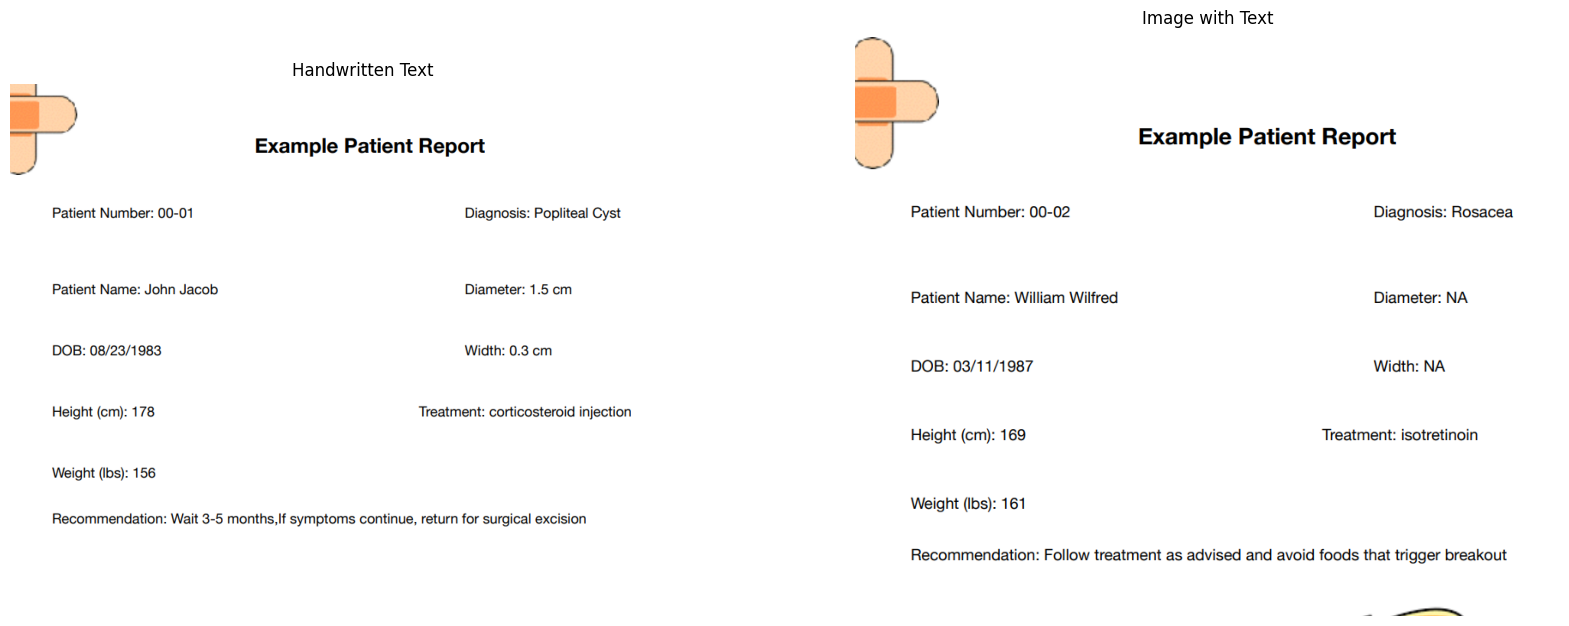

In [ ]:
# Check image objects for images
from PIL import Image
# create figure
fig = plt.figure(figsize=(20, 10))

# setting values to rows and column variables
rows = 1
columns =2

# reading images
Image1 = Image.open('/content/Screenshot (24).png')
Image2 = Image.open('/content/Screenshot (25).png')

# First Image
fig.add_subplot(rows, columns, 1)
plt.imshow(Image1)
plt.axis('off')
plt.title ("Handwritten Text")

# Second Image
fig.add_subplot(rows, columns, 2)
plt.imshow(Image2)
plt.axis('off')
plt.title ("Image with Text")

In [ ]:
# generate text predictions from the images
prediction_groups = pipeline.recognize(images)

3/3 [==============================] - 20s 5s/step


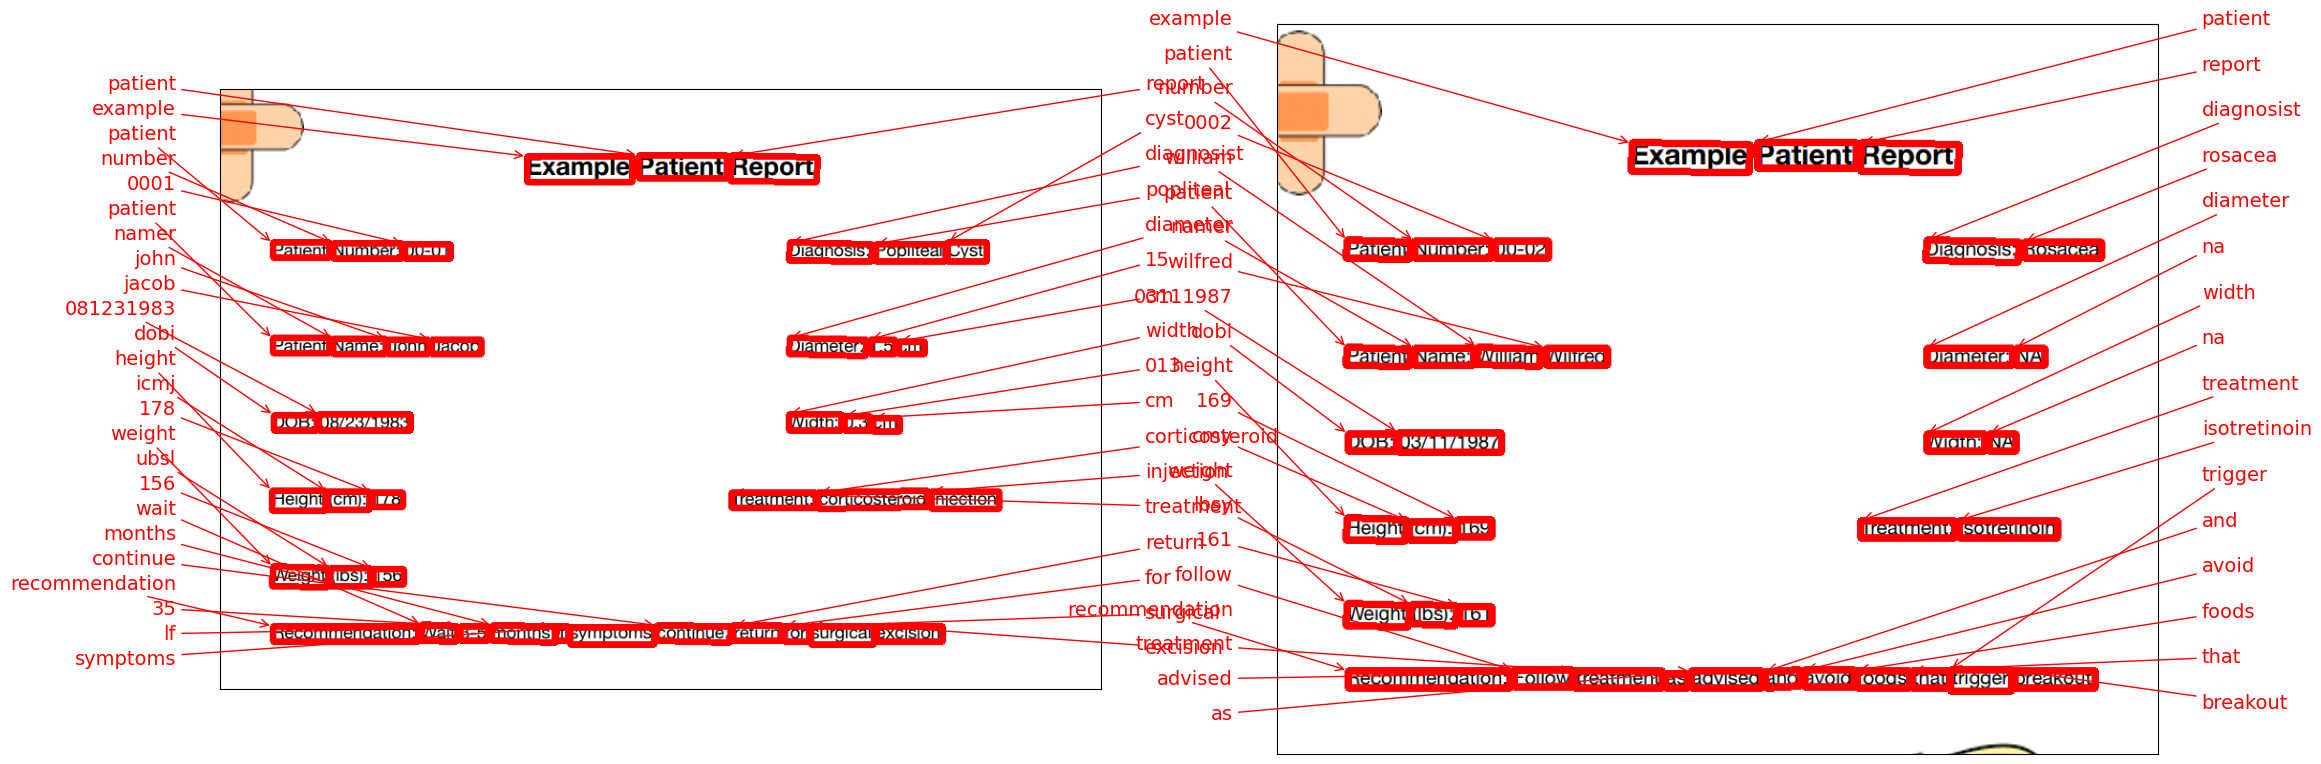

In [ ]:
# plot the text predictions
fig, axs = plt.subplots(ncols=len(images), figsize=(25, 15))
for ax, image, predictions in zip(axs, images, prediction_groups):
    keras_ocr.tools.drawAnnotations(image=image,
                                    predictions=predictions,
                                    ax=ax)

In [ ]:
predicted_image_1 = prediction_groups[0]
for text, box in predicted_image_1:
    print(text)


patient
example
report
patient
number
diagnosist
cyst
0001
popliteal
patient
namer
diameter
john
jacob
15
cm
dobi
081231983
width
013
cm
height
corticosteroid
injection
icmj
178
treatment
weight
ubsl
156
wait
recommendation
35
months
lf
continue
return
for
surgical
excision
symptoms


In [ ]:
predicted_image_2 = prediction_groups[1]
for text, box in predicted_image_2:
    print(text)

In [ ]:
!pip install google-cloud-vision


In [ ]:
# Authentication to Google API
import os
os.environ['GOOGLE_APPLICATION_CREDENTIALS'] ='vision_key.json'

from google.cloud import vision

# re is used to extract IMEI using regex
import re

In [ ]:
vision_client = vision.ImageAnnotatorClient()
image = vision.Image()

image_uri = 'https://upload.wikimedia.org/wikipedia/commons/b/bf/Mobile_phone_IMEI.jpg'

image.source.image_uri = image_uri

DefaultCredentialsError: ignored

In [ ]:
response = vision_client.text_detection(image=image)

In [ ]:
text = response.text_annotations[0].description

imeis = re.findall('[0-9]{14,15}', text)

print(imeis)

In [ ]:
import os
os.environ['GOOGLE_APPLICATION_CREDENTIALS'] ='vision_key.json'
from google.cloud import vision
import re

vision_client = vision.ImageAnnotatorClient()
image = vision.Image()

IMAGE_URI = 'https://upload.wikimedia.org/wikipedia/commons/b/bf/Mobile_phone_IMEI.jpg'

image.source.image_uri = IMAGE_URI

response = vision_client.text_detection(image=image)

text = response.text_annotations[0].description

imeis = re.findall('[0-9]{14,15}', text)

print(imeis)

DefaultCredentialsError: ignored

In [ ]:

import cv2
import imutils
import json
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import requests
import time
from base64 import b64encode
from IPython.display import Image
from pylab import rcParams


rcParams['figure.figsize'] = 10, 20


def makeImageData(imgpath):
    img_req = None
    with open(imgpath, 'rb') as f:
        ctxt = b64encode(f.read()).decode()
        img_req = {
            'image': {
                'content': ctxt
            },
            'features': [{
                'type': 'DOCUMENT_TEXT_DETECTION',
                'maxResults': 1
            }]
        }
    return json.dumps({"requests": img_req}).encode()


def requestOCR(url, api_key, imgpath):
  imgdata = makeImageData(imgpath)
  response = requests.post(ENDPOINT_URL,
                           data = imgdata,
                           params = {'key': api_key},
                           headers = {'Content-Type': 'application/json'})
  return response


with open('vision_api.json') as f:
    data = json.load(f)


ENDPOINT_URL = 'https://vision.googleapis.com/v1/images:annotate'
api_key = data["api_key"]
img_loc = "Image.jpg"


Image(img_loc)


result = requestOCR(ENDPOINT_URL, api_key, img_loc)


if result.status_code != 200 or result.json().get('error'):
    print ("Error")
else:
    result = result.json()['responses'][0]['textAnnotations']


result


for index in range(len(result)):
  print(result[index]["description"])


def gen_cord(result):
  cord_df = pd.DataFrame(result['boundingPoly']['vertices'])
  x_min, y_min = np.min(cord_df["x"]), np.min(cord_df["y"])
  x_max, y_max = np.max(cord_df["x"]), np.max(cord_df["y"])
  return result["description"], x_max, x_min, y_max, y_min


text, x_max, x_min, y_max, y_min = gen_cord(result[-1])
image = cv2.imread(img_loc)
cv2.rectangle(image,(x_min,y_min),(x_max,y_max),(0,255, 0),2)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
print ("Text Detected = {}".format(text))





In [ ]:
!pip install easyocr

In [ ]:
!pip install pdf2image

In [ ]:
!pip install pdf2jpg

In [ ]:
import os
import easyocr
import cv2
from matplotlib import pyplot as plt
import numpy as np
from pdf2image import convert_from_path


In [ ]:
IMAGE_PATH = '/content/Screenshot (24).png'

In [ ]:
from pdf2jpg import pdf2jpg
inputpath = r"/content/patient1pdf.pdf"
outputpath = r""
result = pdf2jpg.convert_pdf2jpg(inputpath,outputpath, pages="ALL")

In [ ]:
path="/content/patient1pdf.pdf_dir/0_patient1pdf.pdf.jpg"

In [ ]:
reader = easyocr.Reader(['en'])
result = reader.readtext(path,paragraph="False")
result


[[[[957, 502], [1730, 502], [1730, 593], [957, 593]],
  'Example Patient Report'],
 [[[295, 733], [767, 733], [767, 785], [295, 785]], 'Patient Number: 00-01'],
 [[[1642, 732], [2168, 732], [2168, 793], [1642, 793]],
  'Diagnosis: Popliteal Cyst'],
 [[[295, 983], [849, 983], [849, 1037], [295, 1037]],
  'Patient Name: John Jacob'],
 [[[1646, 986], [2004, 986], [2004, 1035], [1646, 1035]], 'Diameter: 1.5 cm'],
 [[[297, 1181], [664, 1181], [664, 1233], [297, 1233]], 'DOB: 08/23/1983'],
 [[[1648, 1184], [1940, 1184], [1940, 1233], [1648, 1233]], 'Width: 0.3 cm'],
 [[[294, 1382], [644, 1382], [644, 1443], [294, 1443]], 'Height (cm): 178'],
 [[[1493, 1383], [2200, 1383], [2200, 1440], [1493, 1440]],
  'Treatment: corticosteroid injection'],
 [[[293, 1579], [646, 1579], [646, 1646], [293, 1646]], 'Weight (Ibs): 156'],
 [[[294, 1732], [2054, 1732], [2054, 1794], [294, 1794]],
  'Recommendation: Wait 3-5 months,If symptoms continue, return for surgical excision']]

In [ ]:

for i in result:
  print(i[-1])

Example Patient Report
Patient Number: 00-01
Diagnosis: Popliteal Cyst
Patient Name: John Jacob
Diameter: 1.5 cm
DOB: 08/23/1983
Width: 0.3 cm
Height (cm): 178
Treatment: corticosteroid injection
Weight (Ibs): 156
Recommendation: Wait 3-5 months,If symptoms continue, return for surgical excision
